In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 14 09:19:54 2022

@author: vivianliu
adopted for jupyter notebook by Alexa Halford
"""
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [23]:
#Parameters
#   data: a data frame or string pathname type
#   target_variable: string with target variable name
#   features (optional): takes a list type with the names of all the 
#                        variables to include. Default is all
#   estimators (optional): integer for number of estimators in 
#                       random forest. Default is 150
#   select (optional): A 4 digit year input that allows users to 
#                       select training data before inputted year
#   rdm_state (optional): integer for random state of random 
#                        forest regression. Defult is 16
#   test_portion (optional): float between 0 and 1 for 
#                         proportion of data used for test. 
#                         Default is 0.25
#   plot: boolean input indicating whether or not to plot the 
#                        prediction and true data. Default is False
#Returns:
#   Does not return a value. Prints out measurements of 
#   accuracy as well as feature importances

data = "../../../Data/combined_data_all_reduced_omni.csv"
target_variable = '400kmDensity'
#Below is our "Standard model" for what we want to compare to. 
using_features = ["irradiance (W/m^2/nm)", "MagTime","SLat", 
                  "SYM/H_INDEX_nT", "1-M_AE_nT", "3-H_KP*10_"]
features = using_features #All
drop_features = ["year", "hour", "minute", "second"] #None
estimators = 150
select = 2008 #None
rdm_state = 16
test_portion = 0.25
plot = True #False

In [24]:
#Further preparing the data 
#Create a dataframe based on data input method
if (type(data) == pd.core.frame.DataFrame):
    merged_df = data;
elif (type(data) == str):
    merged_df = pd.read_csv(data)
#Sort by data for easier reading
merged_df = merged_df.sort_values(by = "Datetime")
merged_df = merged_df.reset_index(drop = True)
    
#Get rid of any rows outside of expected date range
merged_df = merged_df[~(merged_df["Datetime"] < '2002-05-01')]

#Remove datetime column for random forest
merged_df = merged_df.drop("Datetime", axis = 1)


In [25]:
#Set target and feature variables
target = merged_df[target_variable]
target = target*(10**12)
merged_df = merged_df.drop(target_variable, axis = 1)

features_list = list(merged_df.columns)

In [26]:
#Adjust features being used based on user input
if (features == all):
    features_list = features_list
elif (type(features) == list):
    using_features = ["year", "month", "day", "hour", "minute", "second"]
    for element in features:
        using_features.append(element)
    features_list = using_features
    
merged_df = merged_df[features_list]

In [27]:
###Set training and testing groups###
    
#If no testing set specified, create random testing and training groups
if (select == None):
    train_features, test_features, train_target, test_target = train_test_split(merged_df, target, test_size = test_portion, random_state = rdm_state)
else:
    #Choose training and testing data
    train_features = merged_df[merged_df.year <= select]
    size = len(train_features.index)
    test_features = merged_df.iloc[size:]
    train_target = target.iloc[0:size]
    test_target = target.iloc[size:]
    

In [28]:
#Create new variables to hold current dataframe which has datetime values in case they are dropped
#Used for graphing predicted and true values based on date
graph_df = merged_df
features_list_u = features_list.copy()
test_features_u = test_features

In [29]:
#Drop features that user specifies so that they aren't included in the random forest
if (drop_features != None):
    train_features = train_features.drop(drop_features, axis = 1)
    test_features = test_features.drop(drop_features, axis = 1)   
    for element in drop_features:
        features_list.remove(element)

In [30]:
#Train and fit the model
rf = RandomForestRegressor(n_estimators = estimators, random_state = rdm_state)
rf.fit(train_features, train_target)

RandomForestRegressor(n_estimators=150, random_state=16)

In [31]:
#Make predictions and calculate error
predictions = rf.predict(test_features)

In [32]:
#Print the mean absolute error
mean_abs_error = mean_absolute_error(test_target, predictions)
print("\nMean Absolute Error: ", mean_abs_error, " kg/m^3.")


Mean Absolute Error:  0.2902412786933284  kg/m^3.


In [33]:
#Print mean absolute percentage error
mape = mean_absolute_percentage_error(test_target, predictions)
print("Mean Absolute Percentage Error: ", mape)

Mean Absolute Percentage Error:  0.33746639320192523


In [34]:
#Print r-squared score of model
score = r2_score(test_target, predictions)
print("Score: ", score)

Score:  0.8602557855768721


In [37]:
#Examine feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [36]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: irradiance (W/m^2/nm) Importance: 0.74
Variable: MagTime              Importance: 0.09
Variable: month                Importance: 0.04
Variable: SLat                 Importance: 0.04
Variable: SYM/H_INDEX_nT       Importance: 0.04
Variable: 3-H_KP*10_           Importance: 0.02
Variable: day                  Importance: 0.01
Variable: 1-M_AE_nT            Importance: 0.01


[None, None, None, None, None, None, None, None]

/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for 

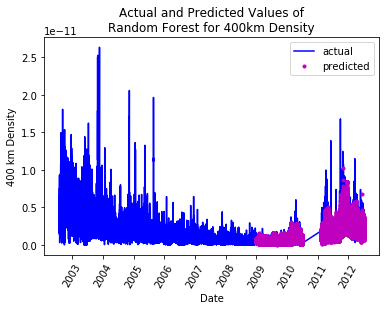

In [38]:
if (plot == True):
    #Create arrays for the datetime values for the true data
    months = graph_df.iloc[:, features_list_u.index('month')]
    days = graph_df.iloc[:, features_list_u.index('day')]
    years = graph_df.iloc[:, features_list_u.index('year')]
    hours = graph_df.iloc[:, features_list_u.index('hour')]
    minutes = graph_df.iloc[:, features_list_u.index('minute')]
    seconds = graph_df.iloc[:, features_list_u.index('second')]
    
    #Convert datetime arrays to datetime type
    dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) + " " + str(int(hour)) + ":" + str(int(minute)) + ":" + str(int(second)) for year, month, day, hour, minute, second in zip(years, months, days, hours, minutes, seconds)]
    dates = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in dates]
    
    #Create dataframe using datetime and target data
    true_data = pd.DataFrame(data = {'date': dates, 'actual': target})
    true_data = true_data.sort_values(by = "date")
    true_data["actual"] = true_data["actual"] / (10**12)
    
    #Create arrays for the datetime values for the predicted data
    months = test_features_u.iloc[:, features_list_u.index('month')]
    days = test_features_u.iloc[:, features_list_u.index('day')]
    years = test_features_u.iloc[:, features_list_u.index('year')]
    hours = test_features_u.iloc[:, features_list_u.index('hour')]
    minutes = test_features_u.iloc[:, features_list_u.index('minute')]
    seconds = test_features_u.iloc[:, features_list_u.index('second')]
    
    #Convert datetime arrays to datetime type
    test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) + " " + str(int(hour)) + ":" + str(int(minute)) + ":" + str(int(second)) for year, month, day, hour, minute, second in zip(years, months, days, hours, minutes, seconds)]
    test_dates = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in test_dates]
    
    #Make a new dataframe with prediction data
    prediction_data = pd.DataFrame(data = {"dates": test_dates, "predictions": predictions})
    prediction_data = prediction_data.sort_values(by = "dates")
    prediction_data["predictions"] = prediction_data["predictions"] / (10**12)
    
    #Plot the true values in blue
    plt.plot(true_data["date"], true_data["actual"], "b-", label = "actual")
    #Plot predicted values in magenta
    plt.plot(prediction_data["dates"], prediction_data["predictions"], "mo", label = "predicted", markersize = 3)
    
    
    #Label Plot
    plt.xticks(rotation = 60)
    plt.xlabel("Date")
    plt.ylabel("400 km Density")
    plt.title("Actual and Predicted Values of\nRandom Forest for 400km Density")
    plt.legend()

2006 2012
